# Markov Chain simulation on a sample student state space

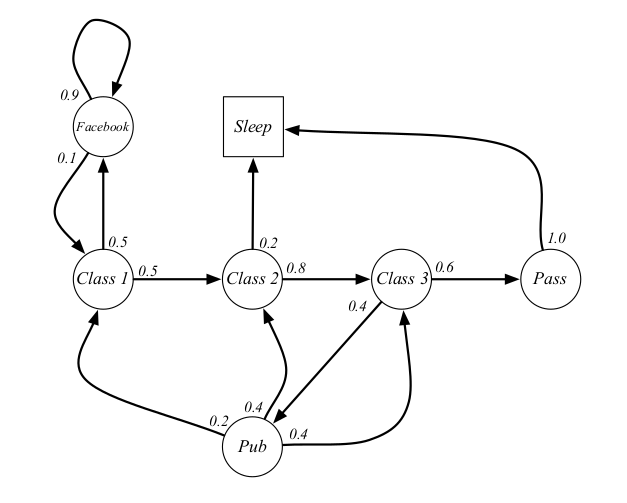

In [1]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
from statistics import mean 

class MarkovChain:
    def __init__(self, states, start, terminal, TPM):
        self.states=states
        self.start=start
        self.terminal=terminal
        self.current=random.choice(self.start)        
        self.P=TPM
        
    def transition(self):              
        cdf = self.P.loc[self.current].cumsum()
        state = (cdf>=random.random()).idxmax()
        self.current=state       

    def reset(self):
        self.current=random.choice(self.start)  
        

## Sample Episodes for Student Markov Chain

In [3]:
print("Welcome To Student Markov Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))

states=["c1","c2","c3","pass","pub","fb","sleep"]
start=["c1"]
terminal=["sleep"]      
TPM=pd.DataFrame(
    np.array([[0,0.5,0,0,0,0.5,0],
        [0,0,0.8,0,0,0,0.2],
        [0,0,0,0.6,0.4,0,0],
        [0,0,0,0,0,0,1.0],
        [0.2,0.4,0.4,0,0,0,0],
        [0.1,0,0,0,0,0.9,0],
        [0,0,0,0,0,0,1.0]]),
    index=states, columns=states)

studmp = MarkovChain(states, start, terminal, TPM)

for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmp.reset()
    while(studmp.current not in studmp.terminal):
        chainwalk=chainwalk+"->"+studmp.current
        studmp.transition()
    chainwalk=chainwalk+"->"+studmp.current
    print(chainwalk)

Welcome To Student Markov Process Simulator!

Enter no. of random walks: 5
RW 1:
->c1->fb->fb->c1->fb->c1->fb->c1->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->c1->c2->c3->pass->sleep
RW 2:
->c1->c2->c3->pub->c3->pass->sleep
RW 3:
->c1->fb->fb->fb->fb->fb->fb->fb->c1->c2->c3->pub->c2->c3->pass->sleep
RW 4:
->c1->fb->fb->fb->fb->fb->fb->fb->fb->fb->c1->c2->c3->pub->c2->c3->pass->sleep
RW 5:
->c1->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->c1->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->c1->c2->sleep


# Markov Reward Process simulation on a sample student state space

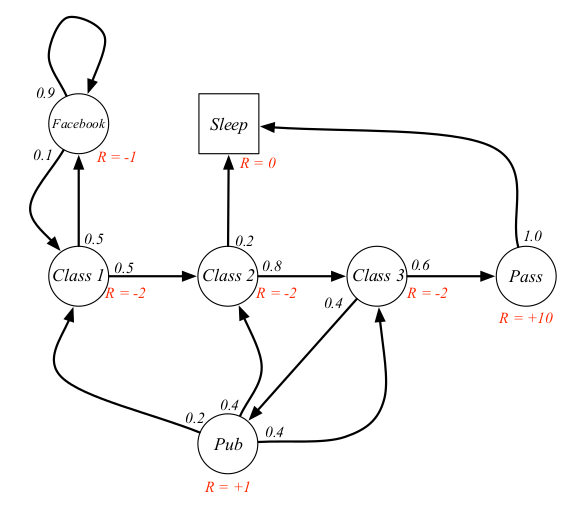

In [16]:
class MRP:
    def __init__(self, states, start, terminal, TPM, RF, gamma=1):
        self.states=states
        self.start=start
        self.terminal=terminal
        self.current=random.choice(self.start)        
        self.P=TPM        
        self.R=RF
        self.V=pd.Series(np.zeros(len(states)), index=self.states)
        self.gamma=gamma
        self.G=0
        self.t=1
        
    def transition(self):       
        cdf = self.P.loc[self.current].cumsum()        
        state = (cdf>=random.random()).idxmax()                     #While exiting from current state        
        self.t=self.t+1                                              #Increase the step count
        self.G=self.G+pow(self.gamma,self.t-2)*self.R[self.current]  #Calculate total reward
        print("{:5} | {:6} | {:8}".format(self.current, self.R[self.current], pow(self.gamma,self.t-2)))    
        self.current=state          
        
    def total_reward(self):
        return self.G
    
    def calc_state_value(self, itr=10, inv=False):        
        if inv:
            invmat =  np.linalg.inv(np.identity(self.V.shape[-1])-self.gamma*self.P)
            self.V = np.matmul(invmat,self.R)
        else:        
            for i in range(itr):
                self.V = self.R + self.gamma*np.matmul(self.P,self.V)        

    def reset(self):
        self.current=random.choice(self.start)
        self.G=0
        self.t=1

## Sample Episodes for Student Markov Reward Process

In [17]:
print("Welcome To Student Markov Reward Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))

states=["c1","c2","c3","pass","pub","fb","sleep"]
start=["c1"]
terminal=["sleep"]        
RF=pd.Series(np.array([-2,-2,-2,10,1,-1,0]), index=states) 
P=pd.DataFrame(np.array([[0,0.5,0,0,0,0.5,0],
                [0,0,0.8,0,0,0,0.2],
                [0,0,0,0.6,0.4,0,0],
                [0,0,0,0,0,0,1.0],
                [0.2,0.4,0.4,0,0,0,0],
                [0.1,0,0,0,0,0.9,0],
                [0,0,0,0,0,0,1.0]]),
                index=states, columns=states)

studmrp = MRP(states, start, terminal, TPM, RF, 0.5)

for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmrp.reset()
    print("State | Reward | Discount")
    while(studmrp.current not in studmrp.terminal):
        chainwalk=chainwalk+"->"+studmrp.current
        studmrp.transition()
    chainwalk=chainwalk+"->"+studmrp.current
    trew=studmrp.total_reward()
    print(chainwalk)
    print("You earned: {} points!".format(trew))
    print(" ")

Welcome To Student Markov Reward Process Simulator!

Enter no. of random walks: 5
RW 1:
State | Reward | Discount
c1    |     -2 |      1.0
fb    |     -1 |      0.5
fb    |     -1 |     0.25
fb    |     -1 |    0.125
fb    |     -1 |   0.0625
fb    |     -1 |  0.03125
fb    |     -1 | 0.015625
fb    |     -1 | 0.0078125
fb    |     -1 | 0.00390625
fb    |     -1 | 0.001953125
fb    |     -1 | 0.0009765625
c1    |     -2 | 0.00048828125
fb    |     -1 | 0.000244140625
fb    |     -1 | 0.0001220703125
fb    |     -1 | 6.103515625e-05
fb    |     -1 | 3.0517578125e-05
fb    |     -1 | 1.52587890625e-05
fb    |     -1 | 7.62939453125e-06
fb    |     -1 | 3.814697265625e-06
fb    |     -1 | 1.9073486328125e-06
fb    |     -1 | 9.5367431640625e-07
c1    |     -2 | 4.76837158203125e-07
fb    |     -1 | 2.384185791015625e-07
fb    |     -1 | 1.1920928955078125e-07
fb    |     -1 | 5.960464477539063e-08
fb    |     -1 | 2.9802322387695312e-08
fb    |     -1 | 1.4901161193847656e-08
fb    |    

## Computing State Value Function V(s)

In [8]:
gamma=0
studmrp = MRP(states, start, terminal, TPM, RF, gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 0
-------------
c1    |  -2.0
c2    |  -2.0
c3    |  -2.0
pass  |  10.0
pub   |   1.0
fb    |  -1.0
sleep |   0.0


In [9]:
gamma=0.9
studmrp = MRP(states, start, terminal, TPM, RF, gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 0.9
-------------
c1    | -5.012728910014523
c2    | 0.9426552976939075
c3    | 4.087021246797094
pass  |  10.0
pub   | 1.9083923522141462
fb    | -7.637608431059514
sleep |   0.0


In [10]:
gamma=0.9
studmrp = MRP(states, start, terminal, TPM, RF, gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 0.9
-------------
c1    | -5.012727855225977
c2    | 0.9426554118409229
c3    | 4.087021383127378
pass  |  10.0
pub   | 1.9083926778634264
fb    | -7.637606529565592
sleep |   0.0


In [11]:
gamma=1
studmrp = MRP(states, start, terminal, TPM, RF, gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

LinAlgError: Singular matrix

In [18]:
gamma=1
studmrp = MRP(states, start, terminal, TPM, RF, gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 1
-------------
c1    | -12.418287702397645
c2    | 1.4703089405374907
c3    | 4.3371337110593915
pass  |  10.0
pub   | 0.8410368812854548
fb    | -22.318009521720207
sleep |   0.0


In [13]:
gamma=0.3
studmrp = MRP(states, start, terminal, TPM, RF, gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 0.3
-------------
c1    | -2.5257034311775595
c2    | -2.0310304960668444
c3    | -0.1292937336118516
pass  |  10.0
pub   | 0.5892188865679029
fb    | -1.4736590451168858
sleep |   0.0


# Markov Decision Process simulation on a sample student state space

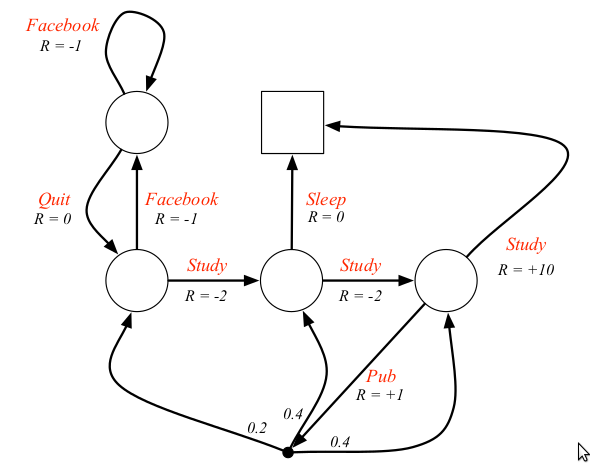

In [69]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
from statistics import mean 
from IPython.display import display, HTML

class MDP:
    def __init__(self, states, start, terminal, actions, Policy, TPMX, RF, gamma=1):
        self.states=states
        self.start=start
        self.terminal=terminal
        self.actions=actions
        self.current=random.choice(self.start) 
        self.P=[]
        self.R = []
        self.gamma=gamma
        self.G=0
        self.t=1
        self.S2A=Policy
        self.A2S=TPMX
        self.A2R = RF        
        self.V=pd.Series(np.zeros(len(states)), index = self.states)
        self.Q=pd.DataFrame(np.zeros(Policy.shape), index = self.states, columns = self.actions)
        self.gamma=gamma
        self.G=0
        self.t=1       
        self.calc_Rpi()
        self.calc_Ppi()
        
    def calc_Rpi(self, f=1):
        rpi = np.matmul(self.S2A, self.A2R)
        #here diagonal of the matrix represents Rpi equation 
        self.R = pd.Series(np.diag(rpi), index = self.states)
        if(f):
            print("Reward Function for the given policy i.e. R\u03C0: ")
            display(self.R)
        
    def calc_Ppi(self, f=1):
        ppi = []
        for i in range(len(self.states)):
            pa2s = np.matmul(self.S2A, self.A2S[i])
            #here ith row of the matrix represents Ppi equation 
            pa2s = pa2s.loc[self.states[i]]
            if np.size(ppi)==0:
                ppi = np.append(ppi,pa2s)
            else:
                ppi = np.vstack((ppi,pa2s))
            
        self.P = pd.DataFrame(ppi, index = self.states, columns = self.states)
        if(f):
            print("Transition Probability for the given policy i.e. P\u03C0: ")
            display(self.P)
        
        
    def transition(self):       
        cdf = self.P.loc[self.current].cumsum()        
        state = (cdf>=random.random()).idxmax()                     #While exiting from current state        
        self.t=self.t+1                                              #Increase the step count
        self.G=self.G+pow(self.gamma,self.t-2)*self.R[self.current]  #Calculate total reward
        print("{:5} | {:6} | {:8}".format(self.current, self.R[self.current], pow(self.gamma,self.t-2)))    
        self.current=state          
        
    def total_reward(self):
        return self.G
    
    def calc_state_value(self, itr=10000, eps = 1e-10, inv=False):        
        if inv:
            invmat =  np.linalg.inv(np.identity(self.V.shape[-1])-self.gamma*self.P)
            self.V = np.matmul(invmat,self.R)
        else:
            for i in range(itr):
                Vprev = self.V[:]                
                self.V = self.R + self.gamma*np.matmul(self.P,self.V)
                if (np.sum((np.fabs(Vprev - self.V))) <= eps):
                    #convergence
                    print("Achieved V\u03C0 after {}th iteration!".format(i))
                    display(self.V)
                    break
    
    def policy_eval(self):
        self.calc_Rpi(0)
        self.calc_Ppi(0)
        self.calc_state_value()
        
    def update_policy(self):
        self.S2A[:] = 0
        loQ = []
        for i in range(len(self.states)):
            qa = np.matmul(self.A2S[i], self.V)
            qpi = self.A2R[self.states[i]] + self.gamma*qa
            self.S2A[qpi.idxmax()] = 1 
            if np.size(loQ)==0:
                loQ = np.append(loQ,qpi)
            else:
                loQ = np.vstack((loQ,qpi))
        self.Q=pd.DataFrame(loQ, index = self.states, columns = self.actions)
                
    def policy_iter(self, itr=10000, eps = 1e-10):        
        for i in range(itr):
            Vprev = self.V[:]           
            self.policy_eval()
            self.update_policy()
            if (np.sum((np.fabs(Vprev - self.V))) <= eps):
                #convergence
                print("Achieved V* after {}th iteration!".format(i))
                display(self.V)
                break

    def reset(self):
        self.current=random.choice(self.start)
        self.G=0
        self.t=1

In [70]:
states = ["c1","c2","c3","fb","sleep"]
actions = ["study", "fb", "quit", "pub", "sleep"]
start = ["c1"]
terminal = ["sleep"]    
RF = pd.DataFrame(np.array([[-2,-2,10,0,0],
                  [-1,0,0,-1,0],
                  [0,0,0,0,0],
                  [0,0,1,0,0],
                  [0,0,0,0,0]]),
                  index = actions, columns = states)
Policy=pd.DataFrame(np.array([[0.5,0.5,0,0,0],
                  [0.5,0,0,0,0.5],
                  [0.5,0,0,0.5,0],
                  [0,0.5,0.5,0,0],
                  [0,0,0,0,1]]),
                  index = states, columns = actions)
#self.A2S= pd.Panel(
TPMX=np.array([
                  [[0,1,0,0,0],
                  [0,0,0,1,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                  [[0,0,1,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,1]],
                  [[0,0,0,0,1],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0.2,0.4,0.4,0,0],
                  [0,0,0,0,0]],
                  [[0,0,0,0,0],
                  [0,0,0,1,0],
                  [1,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                  [[0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                 ]) 
            #), items = self.states, major_axis = self.actions, minor_axis = self.states)

gamma=1
studmdp = MDP(states, start, terminal, actions, Policy, TPMX, RF, gamma)

Reward Function for the given policy i.e. Rπ: 


c1      -1.5
c2      -1.0
c3       5.5
fb      -0.5
sleep    0.0
dtype: float64

Transition Probability for the given policy i.e. Pπ: 


,c1,c2,c3,fb,sleep
c1,0.0,0.5,0.0,0.5,0.0
c2,0.0,0.0,0.5,0.0,0.5
c3,0.1,0.2,0.2,0.0,0.5
fb,0.5,0.0,0.0,0.5,0.0
sleep,0.0,0.0,0.0,0.0,0.0


In [71]:
print("The Given Policy \u03C0(a|s):")
display(studmdp.S2A)

The Given Policy π(a|s):


,study,fb,quit,pub,sleep
c1,0.5,0.5,0.0,0.0,0.0
c2,0.5,0.0,0.0,0.0,0.5
c3,0.5,0.0,0.0,0.5,0.0
fb,0.0,0.5,0.5,0.0,0.0
sleep,0.0,0.0,0.0,0.0,1.0


In [72]:
display(studmdp.A2R)

,c1,c2,c3,fb,sleep
study,-2,-2,10,0,0
fb,-1,0,0,-1,0
quit,0,0,0,0,0
pub,0,0,1,0,0
sleep,0,0,0,0,0


In [73]:
print("Optimal Value for given policy (V\u03C0): ")
studmdp.calc_state_value(itr=10000)

Optimal Value for given policy (Vπ): 
Achieved Vπ after 113th iteration!


c1      -1.307692
c2       2.692308
c3       7.384615
fb      -2.307692
sleep    0.000000
dtype: float64

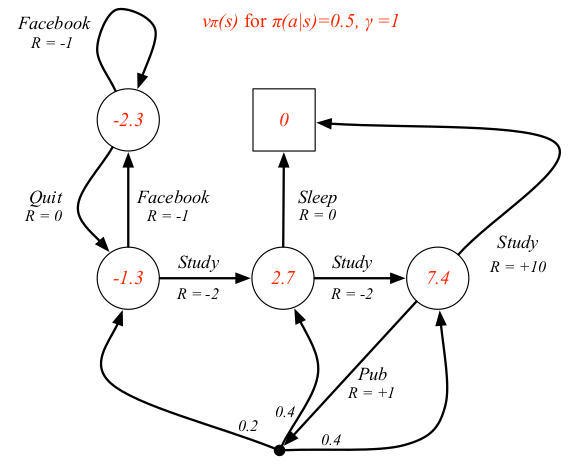

In [74]:
print("Welcome To Student Markov Decision Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))
for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmdp.reset()
    print("State | Reward | Discount")
    while(studmdp.current not in studmdp.terminal):
        chainwalk=chainwalk+"->"+studmdp.current
        studmdp.transition()
    chainwalk=chainwalk+"->"+studmdp.current
    trew=studmdp.total_reward()
    print(chainwalk)
    print("You earned: {} points!".format(trew))
    print(" ")

Welcome To Student Markov Decision Process Simulator!

Enter no. of random walks: 5
RW 1:
State | Reward | Discount
c1    |   -1.5 |        1
fb    |   -0.5 |        1
c1    |   -1.5 |        1
fb    |   -0.5 |        1
c1    |   -1.5 |        1
c2    |   -1.0 |        1
c3    |    5.5 |        1
->c1->fb->c1->fb->c1->c2->c3->sleep
You earned: -1.0 points!
 
RW 2:
State | Reward | Discount
c1    |   -1.5 |        1
c2    |   -1.0 |        1
c3    |    5.5 |        1
->c1->c2->c3->sleep
You earned: 3.0 points!
 
RW 3:
State | Reward | Discount
c1    |   -1.5 |        1
c2    |   -1.0 |        1
c3    |    5.5 |        1
->c1->c2->c3->sleep
You earned: 3.0 points!
 
RW 4:
State | Reward | Discount
c1    |   -1.5 |        1
c2    |   -1.0 |        1
c3    |    5.5 |        1
->c1->c2->c3->sleep
You earned: 3.0 points!
 
RW 5:
State | Reward | Discount
c1    |   -1.5 |        1
fb    |   -0.5 |        1
c1    |   -1.5 |        1
fb    |   -0.5 |        1
c1    |   -1.5 |        1
fb    |  

## Calculate Optimal Policy and V*


In [77]:
print("Optimal Policy Values (V*):")
studmdp.policy_iter(itr=100)

Optimal Policy Values (V*):
Achieved Vπ after 0th iteration!


c1        6.0
c2        8.0
c3       10.0
fb        6.0
sleep     0.0
dtype: float64

Achieved V* after 0th iteration!


c1        6.0
c2        8.0
c3       10.0
fb        6.0
sleep     0.0
dtype: float64

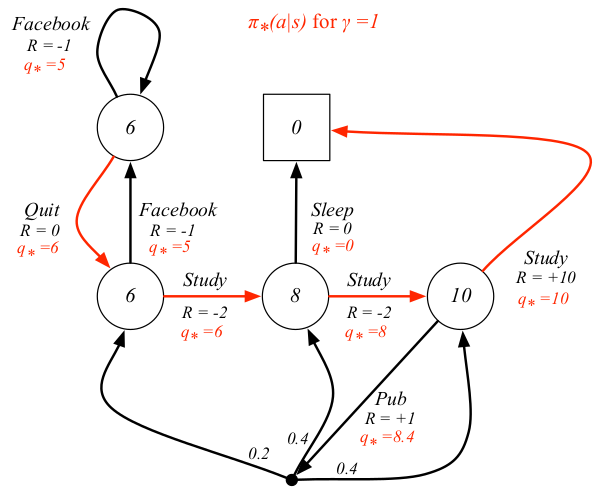

In [80]:
print("Optimal Transition Probabilities (Pi*):")
display(studmdp.P)
print("Optimal Q Values (Q*):")
display(studmdp.Q)

Optimal Transition Probabilities (Pi*):


,c1,c2,c3,fb,sleep
c1,0.0,1.0,0.0,0.0,0.0
c2,0.0,0.0,1.0,0.0,0.0
c3,0.0,0.0,0.0,0.0,1.0
fb,1.0,0.0,0.0,0.0,0.0
sleep,0.0,0.0,0.0,0.0,0.0


Optimal Q Values (Q*):


,study,fb,quit,pub,sleep
c1,6.0,5.0,0.0,0.0,0.0
c2,8.0,0.0,0.0,0.0,0.0
c3,10.0,0.0,0.0,9.4,0.0
fb,0.0,5.0,6.0,0.0,0.0
sleep,0.0,0.0,0.0,0.0,0.0


In [79]:
print("Welcome To Student Markov Decision Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))
for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmdp.reset()
    print("State | Reward | Discount")
    while(studmdp.current not in studmdp.terminal):
        chainwalk=chainwalk+"->"+studmdp.current
        studmdp.transition()
    chainwalk=chainwalk+"->"+studmdp.current
    trew=studmdp.total_reward()
    print(chainwalk)
    print("You earned: {} points!".format(trew))
    print(" ")

Welcome To Student Markov Decision Process Simulator!

Enter no. of random walks: 5
RW 1:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
RW 2:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
RW 3:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
RW 4:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
RW 5:
State | Reward | Discount
c1    |     -2 |        1
c2    |     -2 |        1
c3    |     10 |        1
->c1->c2->c3->sleep
You earned: 6 points!
 
